<a href="https://colab.research.google.com/github/Sputnik1005/may/blob/main/project_draft_copy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install catboost
!pip install pymssql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 9.8 MB/s eta 0:00:00


In [3]:

# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn')



TITLE_COLOR = 'royalblue'

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

import re

import xgboost as xgb
import lightgbm as lgbm
import seaborn as sns
import pymssql
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

### Loading data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Credit Score Classification Ensemble Model.csv")

### Data Exploration

In [6]:
#quick view
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
#check null
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Issues:

* ID, Name and SSN, Age ,month,customeric are not useful => drop cols

* Monthly_Inhand_Salary are highly correlated to Annual_Income => deleted Monthly_Inhand_Salary

* Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt, Monthly_Balance, Age are numerical but show as object => need to be fixed

* Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance have missing data


### Cleaning Data


In [9]:
#Removing Irrelevant Columns
df.drop(columns=['ID', 'Name', 'Age','SSN', 'Month', 'Customer_ID', 'Monthly_Inhand_Salary'], inplace = True)

In [10]:
#Convert to Binary classification
#Converting Credit_Score
df['Credit_Score'] = df['Credit_Score'].replace(['Standard'], 'Good')

In [11]:
df['Credit_Score'].unique()

array(['Good', 'Poor'], dtype=object)

#### Fixing Numerical column

In [12]:
# Fix data type
to_fix = ['Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt', 'Monthly_Balance']
def fix_nums(num):
    try:
        return np.float64(num.replace("_"," "))
    except:
        return np.nan

for col in to_fix:
    df[col] = df[col].apply(fix_nums)

In [13]:
df = df.astype({'Annual_Income': 'int32'})

In [14]:
 num_cols = df.select_dtypes('number').columns.tolist()
 num_cols

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [15]:
df[num_cols].describe()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,1.764152e+05,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.088580e+22
std,1.429618e+06,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.208492e+24
min,7.005000e+03,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,1.945700e+04,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.699858e+02
50%,3.757800e+04,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.364493e+02
75%,7.279000e+04,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.696405e+02
max,2.419806e+07,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


Issues:
Columns contain negative values:
* Age => must be positive
* Num_Bank_Accounts = the number of bank accounts a person holds => must be positive
* Num_of_Loan = the number of loans taken from the bank => must be positive
* Delay_from_due_date = the average number of days delayed from the payment date => can be negative (ie: payments before the due date)
* Num_of_Delayed_Payment = the average number of payments delayed by a person => must be positive
* Changed_Credit_Limit = the percentage change in credit card limit => can be negative
* Monthly_Balance = the monthly balance amount of the customer => can be negative

In [16]:
#Get absolute values
df[['Num_Bank_Accounts', 'Num_of_Loan','Num_of_Delayed_Payment']] = df[['Num_Bank_Accounts', 'Num_of_Loan','Num_of_Delayed_Payment']].apply(lambda x :abs (x))

In [17]:
 #Dealing with abnormal values which are to high to be true

In [18]:
# Numeric columns: 'Long Tail' values
# Tails thresholds were selected manually based on histogram of values after the threshold

#tail_thresholds_per_column = {
#   'Num_Bank_Accounts': 12, 'Num_Credit_Card': 12, 'Interest_Rate': 40,
#    'Num_Credit_Inquiries': 20, 'Num_of_Delayed_Payment': 40,
#   'Annual_Income': 250000, 'Total_EMI_per_month': 2000, 'Num_of_Loan': 30,
#  'Amount_invested_monthly': 2000

In [19]:
# Get the most frequent value columns

abnormal_col = ['Num_Bank_Accounts', 'Num_Credit_Card']
for col in abnormal_col:
  mode_value = df[col].mode()[0]

# Replace values greater than thres hold with the most frequent value
df[col] = np.where(df[col] > 12, mode_value, df[col])

In [20]:
#'Total_EMI_per_month': 20000
mode_value = df['Total_EMI_per_month'].mode()[0]
df['Total_EMI_per_month'] = np.where(df['Total_EMI_per_month'] > 20000, mode_value, df['Total_EMI_per_month'])

In [21]:
#'Amount_invested_monthly': 20000
mode_value = df['Amount_invested_monthly'].mode()[0]
df['Amount_invested_monthly'] = np.where(df['Amount_invested_monthly'] > 20000, mode_value, df['Amount_invested_monthly'])

In [22]:
#'Num_Credit_Inquiries': 20
mode_value = df['Num_Credit_Inquiries'].mode()[0]
df['Num_Credit_Inquiries'] = np.where(df['Num_Credit_Inquiries'] > 20, mode_value, df['Num_Credit_Inquiries'])

In [23]:
#'Num_of_Loan': 30
mode_value = df['Num_of_Loan'].mode()[0]
df['Num_of_Loan'] = np.where(df['Num_of_Loan'] > 30, mode_value, df['Num_of_Loan'])

In [24]:
#'Interest_Rate': 40
mode_value = df['Interest_Rate'].mode()[0]
df['Interest_Rate'] = np.where(df['Interest_Rate'] > 40, mode_value, df['Interest_Rate'])

In [25]:
#'Num_of_Delayed_Payment': 40
mode_value = df['Num_of_Delayed_Payment'].mode()[0]
df['Num_of_Delayed_Payment'] = np.where(df['Num_of_Delayed_Payment'] > 40, mode_value, df['Num_of_Delayed_Payment'])

In [26]:
#'Annual_Income': 250000,
mode_value = df['Annual_Income'].mode()[0]
df['Annual_Income'] = np.where(df['Annual_Income'] > 250000, mode_value, df['Annual_Income'])

In [27]:
df.describe()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,50135.399860,17.091700,5.521210,14.398750,3.511900,21.068780,13.382331,10.389025,5.751140,1426.220376,32.285173,183.853507,637.412998,-3.088580e+22
std,38274.579058,117.404773,2.045632,8.699405,2.401386,14.860104,6.258317,6.789496,3.834935,1155.129026,5.116875,1030.051687,2043.319327,3.208492e+24
min,7005.000000,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,19126.000000,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,27.093862,74.534002,2.699858e+02
50%,36722.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,64.975909,135.925682,3.364493e+02
75%,71367.250000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,8.000000,1945.962500,36.496663,146.796776,265.731733,4.696405e+02
max,179987.000000,1798.000000,11.000000,34.000000,29.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,19997.000000,10000.000000,1.602041e+03


#### Fixing Categorical Data

In [28]:
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [29]:
for col in cat_cols:
            print(col)
            print(df[col].unique())
            print('-'*100)

Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
----------------------------------------------------------------------------------------------------
Type_of_Loan
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
----------------------------------------------------------------------------------------------------
Credit_Mix
['_' 'Good' 'Standard' 'Bad']
----------------------------------------------------------------------------------------------------
Credit_History_Age
['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years an

* Type_of_Loan: Divide type of loans into different columns

* Credit_History_Age: Convert 'years and months' to months

* Payment_of_Min_Amount: Replace "NM"

* Payment_Behaviour: replace "!@9#%8". Convert into 2 cols: Spent and Value

* Credit_Score: Standard => Good. To make it binary classification

* Credit_Mix: replace "_", Standard => Good

In [30]:
#Occupation Column
df['Occupation'].replace('_______',np.nan,inplace = True)
df['Occupation'].value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [31]:
# History age: convert 'years and months' to months
def History_age(age):
    try:
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except:
        return np.nan

#re.findall()
#Phương thức re.findall() trả về một danh sách các chuỗi chứa tất cả các kết quả khớp với pattern đưa ra.

In [32]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

In [33]:
df[['Credit_History_Age']]

,Credit_History_Age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
...,...
99995,378.0
99996,379.0
99997,380.0
99998,381.0


In [34]:
df[['Type_of_Loan']]

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
...,...
99995,"Auto Loan, and Student Loan"
99996,"Auto Loan, and Student Loan"
99997,"Auto Loan, and Student Loan"
99998,"Auto Loan, and Student Loan"


In [35]:
### Type_of_Loan: Divide  into different columns
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] :
    df[i] = df['Type_of_Loan'].str.contains(i)

In [36]:
del df['Type_of_Loan']

In [37]:
loan = df.columns[-8:]
for col in loan:
    df[loan] = df[loan].astype(float)

In [38]:
#Payment_of_Min_Amount' column
df['Payment_of_Min_Amount'].replace("NM","No",inplace = True)
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [39]:
#Payment_Behaviour Column
df['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace = True)
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [40]:
df['Payment_Behaviour']

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                                 NaN
Name: Payment_Behaviour, Length: 100000, dtype: object

In [41]:
df.Payment_Behaviour.head(1)

0    High_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [42]:
def transform_payment_behaviour(data):
    mask = data['Payment_Behaviour'].notnull()

    data['Spent'] = data[mask]['Payment_Behaviour'].apply(lambda x: str(x).split('_')[0])
    data['Value_Payments'] = data[mask]['Payment_Behaviour'].apply(lambda x: str(x).split('_')[2])

    data = data.drop('Payment_Behaviour', axis = 1)
    return data

In [43]:
df = transform_payment_behaviour(df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                92938 non-null   object 
 1   Annual_Income             100000 non-null  int32  
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   float64
 8   Changed_Credit_Limit      97909 non-null   float64
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   fl

In [45]:
#Credit_Mix Column

In [46]:
df['Credit_Mix'].replace('Standard','Good',inplace = True)

In [47]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Bad'], dtype=object)

In [48]:
df['Credit_Mix'].replace('_',np.nan,inplace = True)

#### Divide Num vs Cat

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                92938 non-null   object 
 1   Annual_Income             100000 non-null  int32  
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   float64
 8   Changed_Credit_Limit      97909 non-null   float64
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                79805 non-null   object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   fl

In [50]:
Numericals = ['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
  'Credit_History_Age']
Numericals

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age']

In [51]:
Categorical = ['Occupation', 'Payment_of_Min_Amount','Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan','Credit_Mix','Credit_Score', 'Spent', 'Value_Payments']
Categorical

['Occupation',
 'Payment_of_Min_Amount',
 'Credit-Builder Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Home Equity Loan',
 'Credit_Mix',
 'Credit_Score',
 'Spent',
 'Value_Payments']

#### Handling Missing data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                92938 non-null   object 
 1   Annual_Income             100000 non-null  int32  
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   float64
 8   Changed_Credit_Limit      97909 non-null   float64
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                79805 non-null   object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   fl

In [53]:
#Apply mean strategy because the data is numerical
imputer = SimpleImputer()

for col in Numericals:
    df[Numericals] = imputer.fit_transform(df[Numericals])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                92938 non-null   object 
 1   Annual_Income             100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                79805 non-null   object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [55]:
#Apply most frequent strategy because the data is categorical
imputer = SimpleImputer(strategy = "most_frequent")
missing_cat = ['Credit_Mix','Spent','Value_Payments', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan','Occupation']

imputer.fit(df[missing_cat])
df[missing_cat] = imputer.transform(df[missing_cat])


In [56]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


### EDA

#### Visualize Target

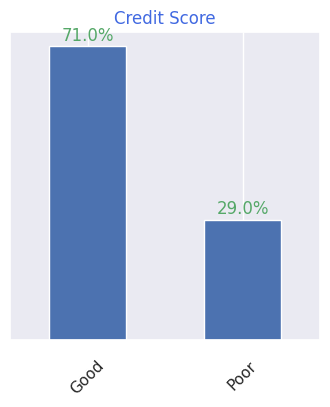

In [57]:
def visualize_target(data, target_encoding = 'Credit_Score', figsize = (4, 4)):
    sns.set(font_scale = 1)
    plt.figure(figsize = figsize)
    rel_freq = data[target_encoding].value_counts(normalize = True, ascending = False) * 100

    rel_freq.plot(kind = 'bar', rot = 45)

    for i in range(rel_freq.shape[0]):
        plt.text(i, rel_freq.iloc[i] + 0.5, str(round(rel_freq.iloc[i], 1)) + '%',
                 ha = 'center',va = 'bottom', color = 'g')

    plt.yticks([], [])
    plt.title(' '.join(target_encoding.split('_')), color = TITLE_COLOR)

visualize_target(df)

There is huge class-imbalance which can lead to bias in model performance.
So to overcome this class-imbalance we have to use over-sampling technique from RandomOverSampler.

#### Visualizing categorical columns

In [58]:
Categorical

['Occupation',
 'Payment_of_Min_Amount',
 'Credit-Builder Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Home Equity Loan',
 'Credit_Mix',
 'Credit_Score',
 'Spent',
 'Value_Payments']

In [59]:
df_cat= df[Categorical]

In [60]:
df_cat.head()

,Occupation,Payment_of_Min_Amount,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Credit_Mix,Credit_Score,Spent,Value_Payments
0,Scientist,No,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,Good,High,Small
1,Scientist,No,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,Good,Low,Large
2,Scientist,No,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,Good,Low,Medium
3,Scientist,No,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,Good,Low,Small
4,Scientist,No,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Good,Good,High,Medium


In [61]:
def crosstab_barplot(feature_for_index, feature_for_columns, ax = None, legend = True, rotation = 0):

    crosstab_result = pd.crosstab(
        index = df_cat[feature_for_index],
        columns = df_cat[feature_for_columns]
    )

    barplot = crosstab_result.plot.bar(stacked = True, rot = rotation, legend = legend, ax = ax)

In [62]:
def show_countplot(column_pairs, rotation = 0, legend = True, scalor = 5):

    n = len(column_pairs)

    fig = plt.figure(figsize = (scalor * n, 4))
    fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

    fig.suptitle('Credit Score dependency')

    for i in range(1, n + 1):
        column_pair = column_pairs[i - 1]

        ax = fig.add_subplot(1, n, i)
        crosstab_barplot(column_pair[0], column_pair[1], ax, rotation = rotation, legend = legend)

    plt.show()

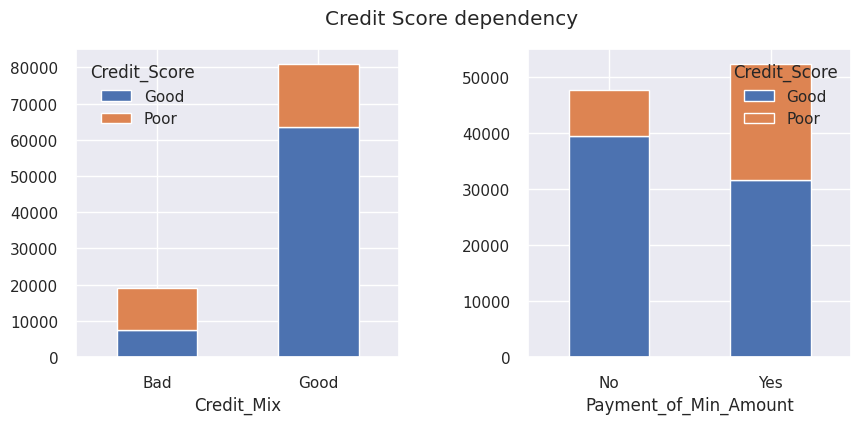

In [63]:
show_countplot([
    ['Credit_Mix', 'Credit_Score'],
    ['Payment_of_Min_Amount', 'Credit_Score']
])

* Good Credit Mix and No Payment of Min Amount are predictive for the Good Credit Score
* vice versa, Bad Credit Mix and Yes Payment of Min Amount are predictive for the Poor Credit Score


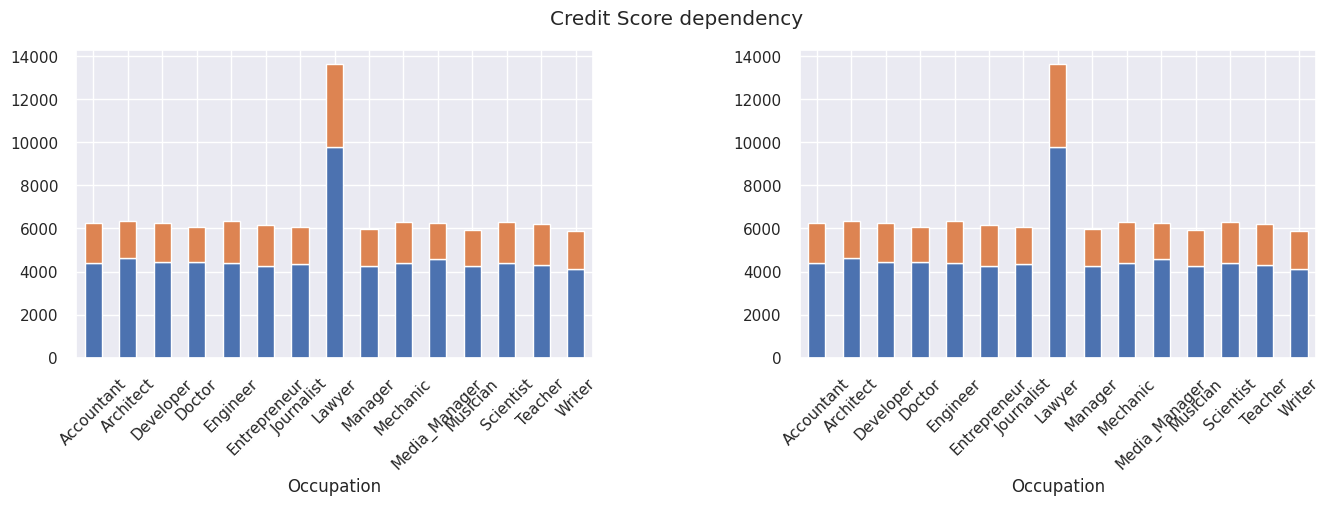

In [64]:
show_countplot((['Occupation', 'Credit_Score'],['Occupation', 'Credit_Score']), rotation = 45, legend = False, scalor = 8)

* Occupation is distributed uniformly and Values of Credit Score are distributed uniformly per Occupation
* => drop Occupation because is not predictive

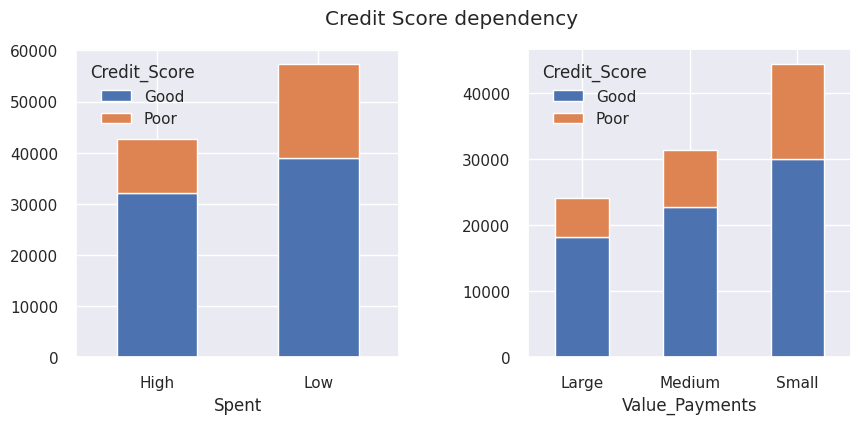

In [65]:
show_countplot([
    ['Spent', 'Credit_Score'],
    ['Value_Payments', 'Credit_Score']
], legend = True)

* While Good Credit Score value is spread uniformly per each value of Spent and Value_Payments, the Poor Credit Score values represented more in Low Spent and Small Value_Payments

In [66]:
loan = ['Credit-Builder Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Home Equity Loan']

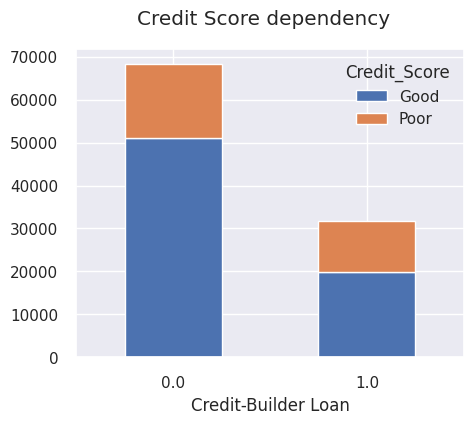

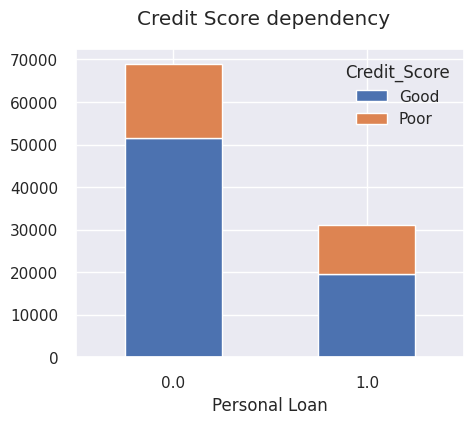

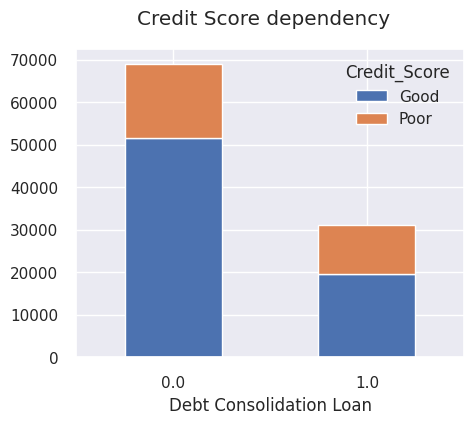

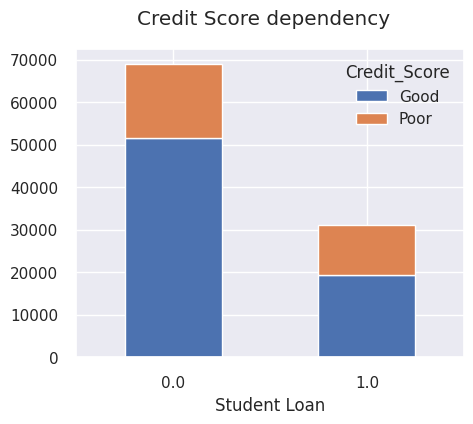

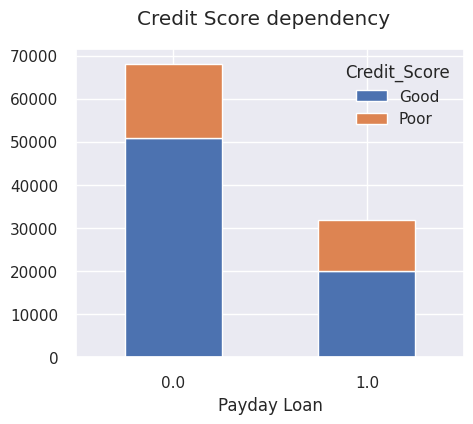

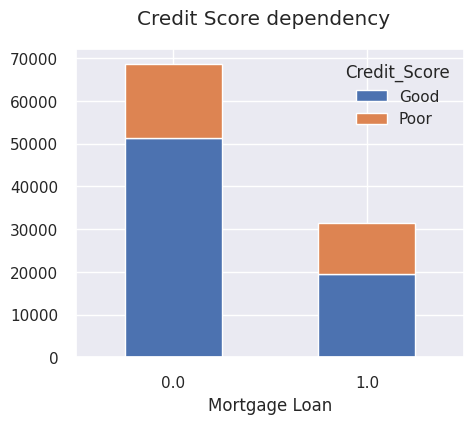

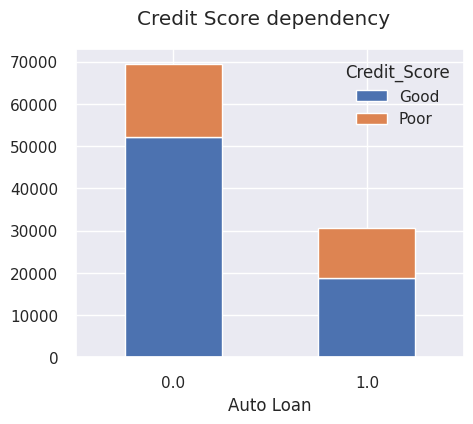

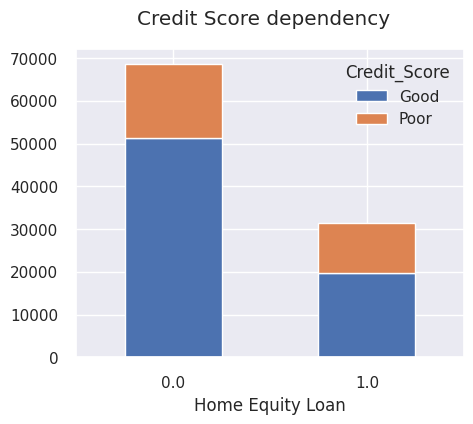

In [67]:
for col in loan:
  show_countplot([[col, 'Credit_Score']], legend = True)

* Types of Loan are distributed uniformly and Values of Credit Score are distributed uniformly per Type of Loan
=> not predictive

#### Visualize numerical columns

In [68]:
Numericals

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age']

In [69]:
df_num = df[['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
  'Credit_History_Age',
  'Credit_Score']]

In [70]:
def show_correlation_heatmap(data, sidesize = 20):

    # Set the width and height of the figure
    plt.figure(figsize = (sidesize, sidesize))

    correlations = data.select_dtypes(include = np.number).corr().round(3)

    plt.title('Correlation of parameters', fontsize = 20)
    hm = sns.heatmap(
        data = correlations,
        annot = True,
        square = True,
        cbar_kws = {'fraction' : 0.05},
        cmap = 'PuBu'
    )

    hm.set_xticklabels(hm.get_xticklabels(), horizontalalignment = 'right', fontsize = 10, rotation = 45)
    hm.set_yticklabels(hm.get_yticklabels(), horizontalalignment = 'right', fontsize = 10)

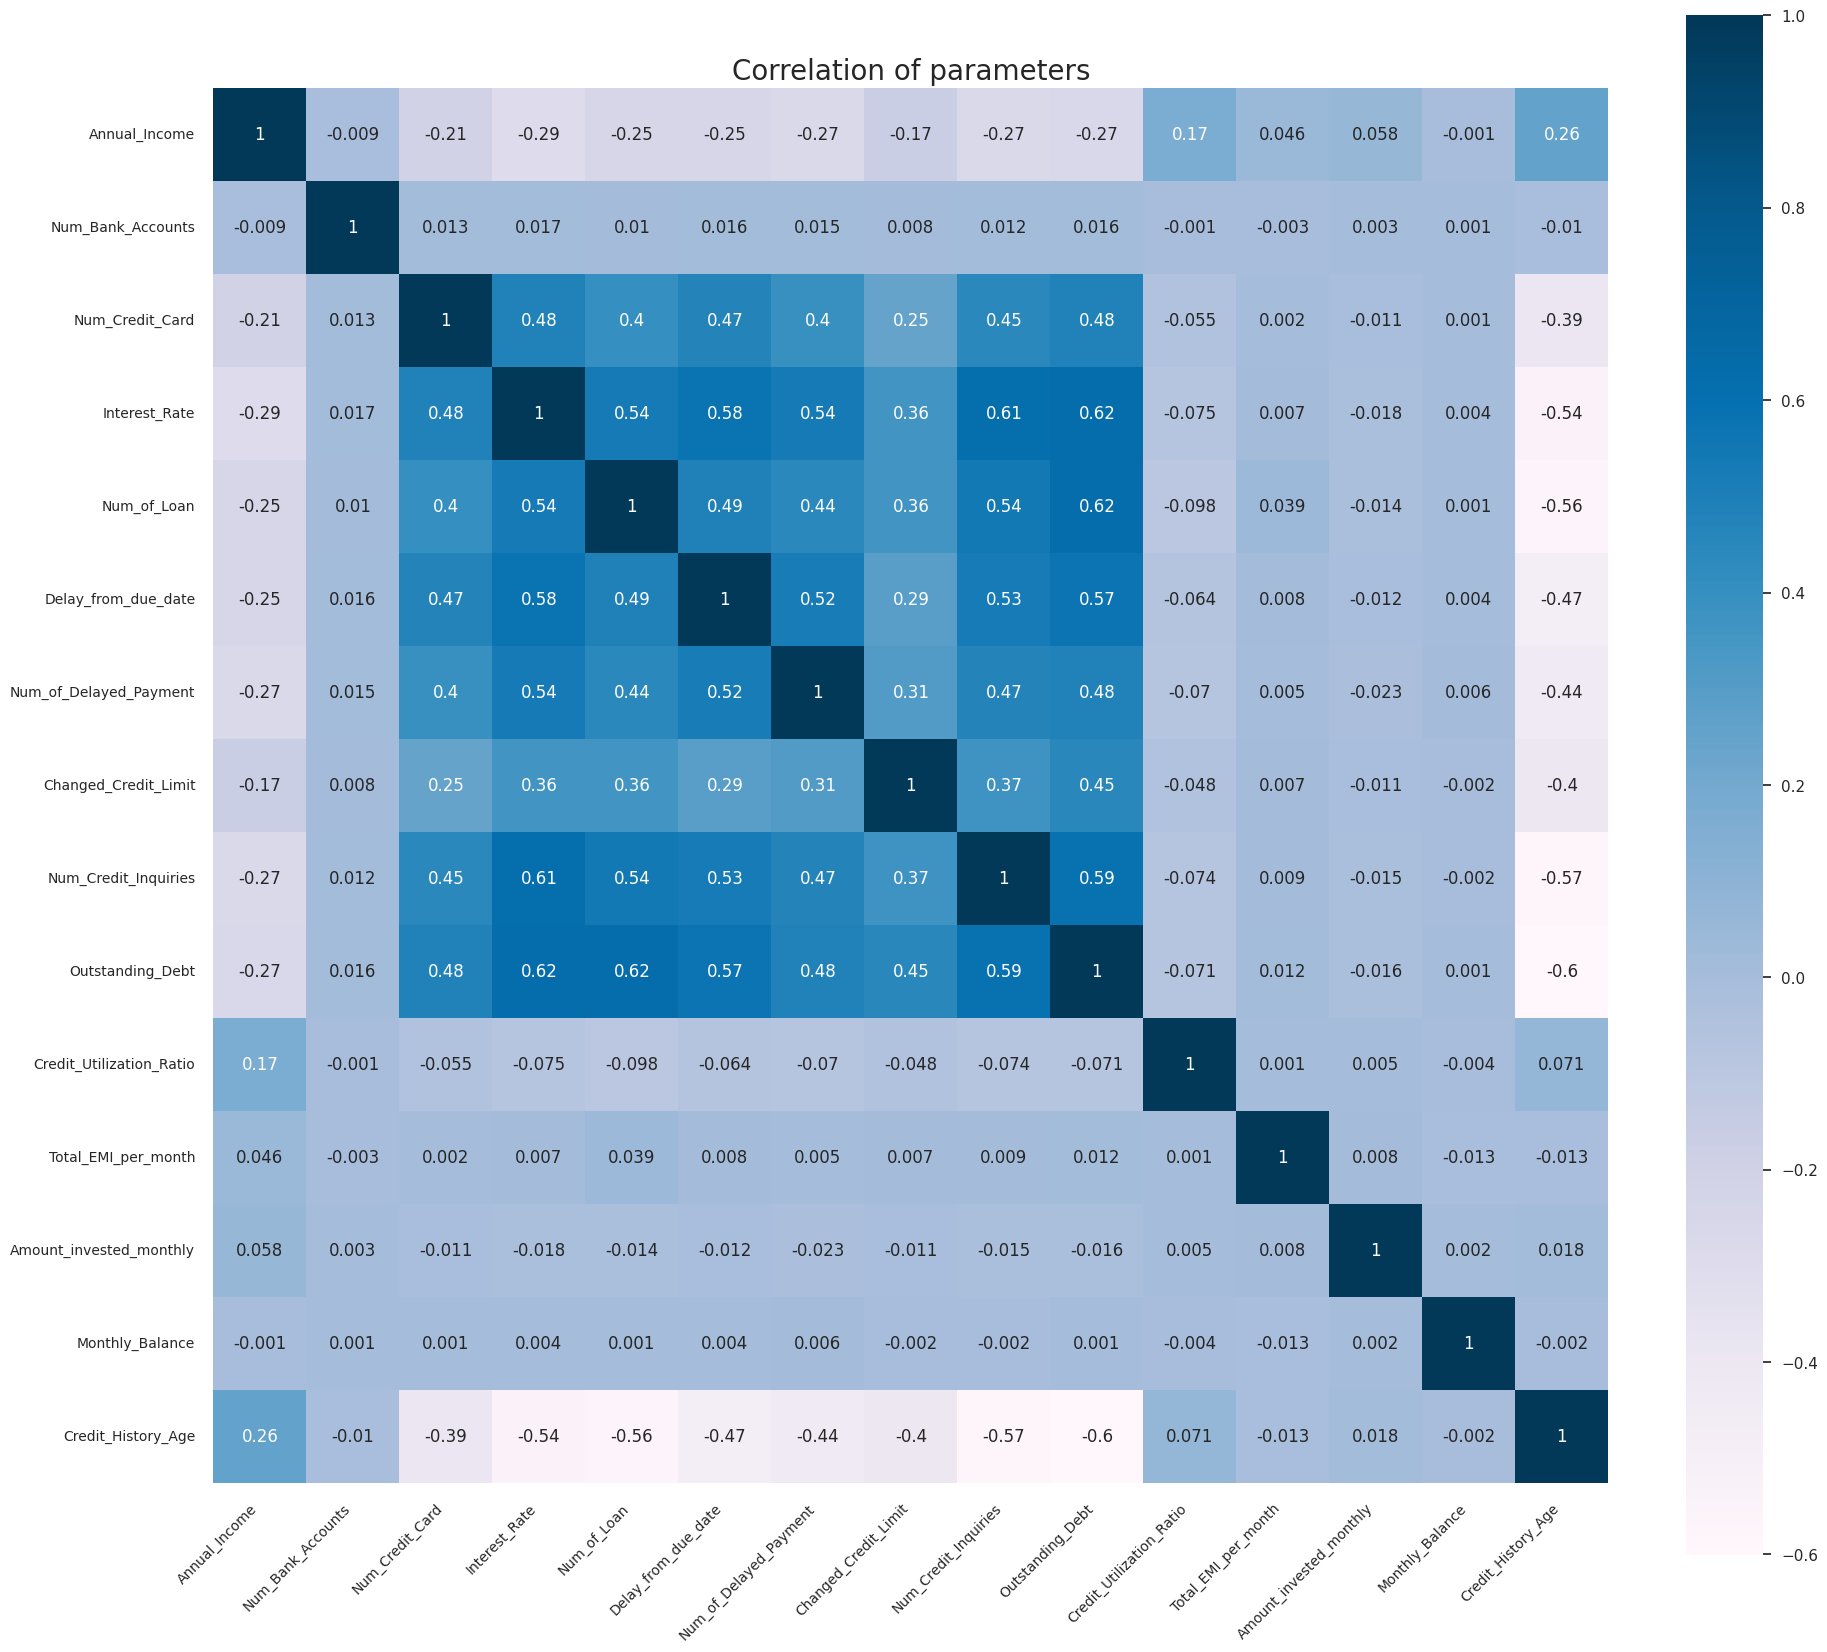

In [71]:
show_correlation_heatmap(df_num, sidesize = 20)

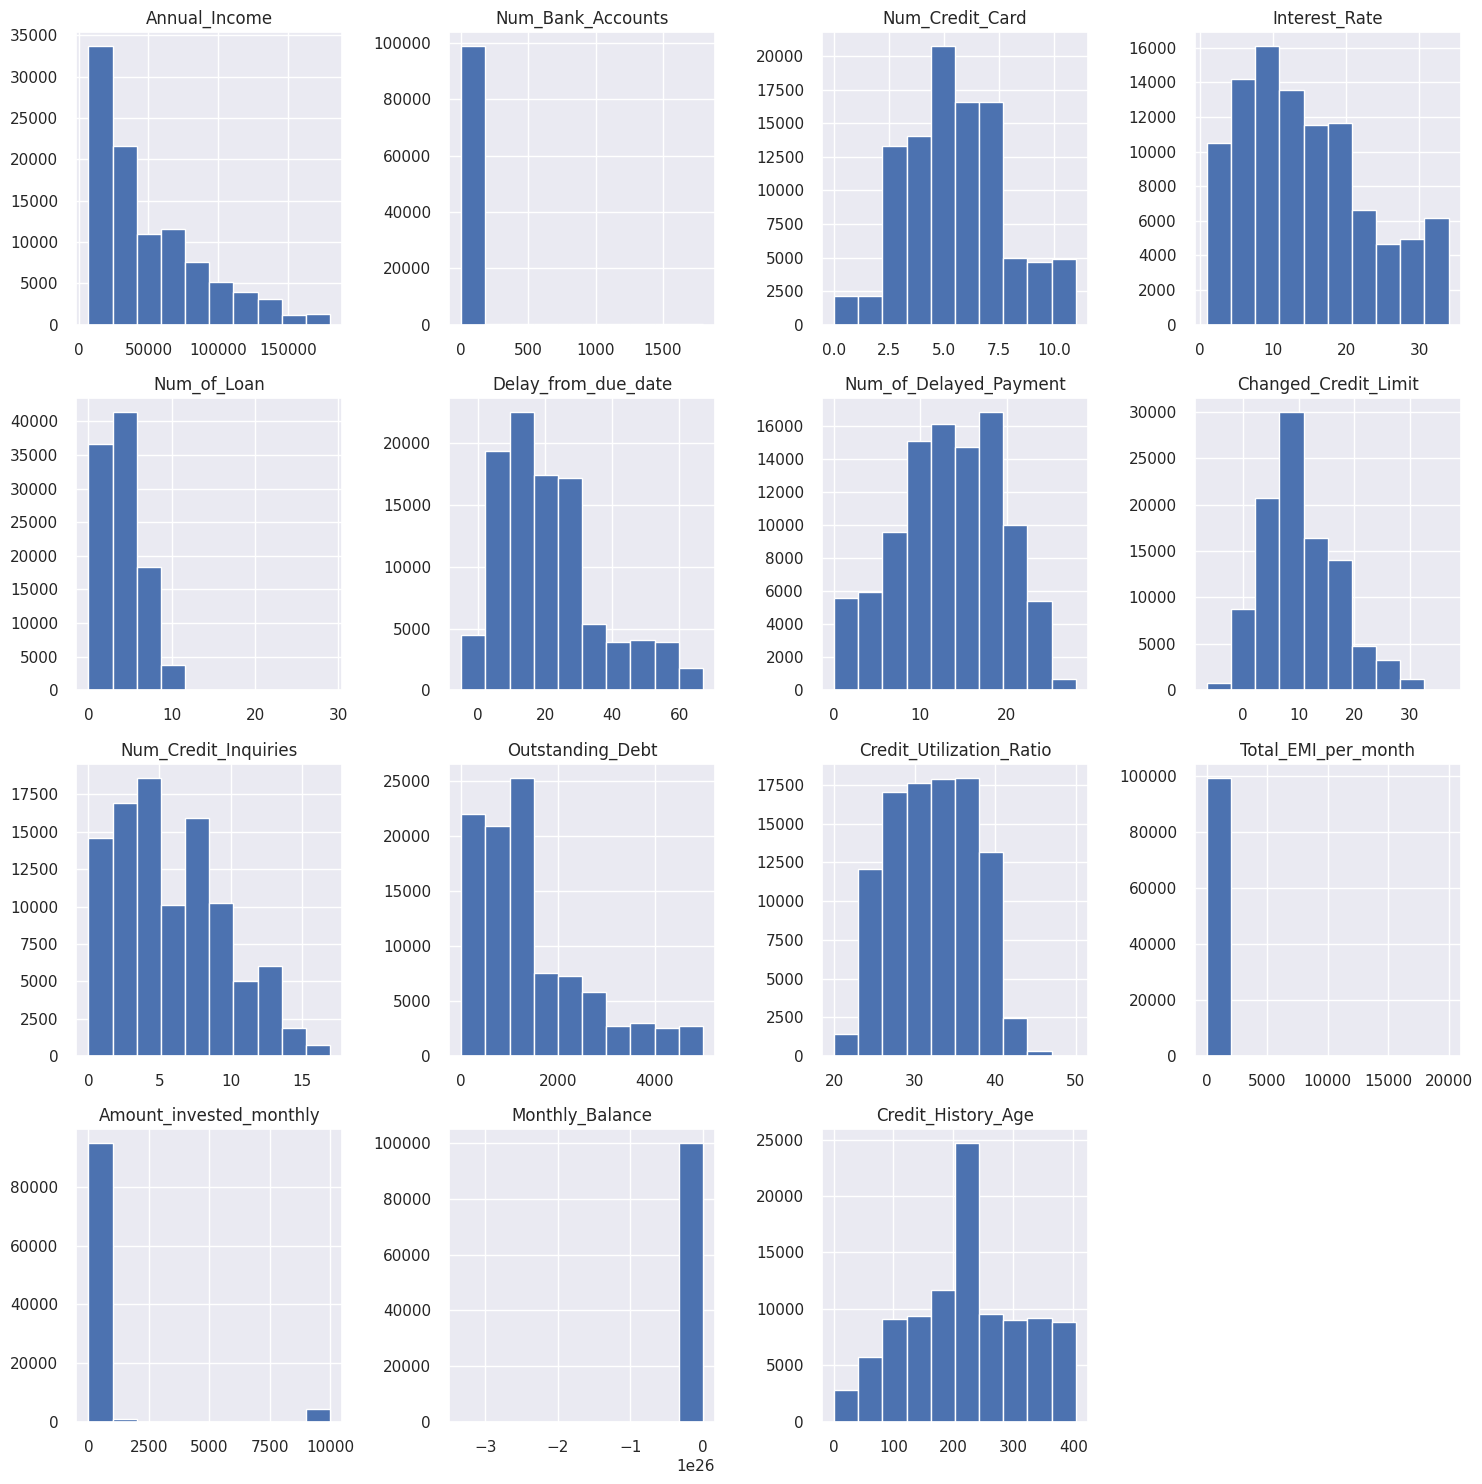

In [72]:
df_num.hist(figsize = (15, 15))
plt.tight_layout()

Right-Skewed (Positively Skewed):
1.	Annual Income: Most people have lower annual incomes.
2.	Num_of_Loan: Most individuals have fewer loans.
3.	Delay_from_due_date: Payments are made closer to the due date.
4.	Num_of_Delayed_Payment: Most people have fewer delayed payments.
5.	Changed_Credit_Limit: Two distinct groups with different credit limit changes.
6.	Total_EMI_per_month: Many individuals pay smaller total EMIs per month.
7.	Amount_invested_monthly: More individuals invest smaller amounts monthly.
8. Interest_Rate: Most people have higher Interest rate

Left-Skewed (Negatively Skewed):
1.	Monthly_Balance: Larger number of individuals maintain higher monthly balances.

Not Skewed (Symmetrical):
1.  Num_Bank_Accounts
2. Num_Credit_Card
3. Credit_Utilization_Ratio

In [73]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Credit_Score",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Credit Score ",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot( data = df, x = df['Credit_Score'], y =df[column], hue = 'Credit_Score', palette="Set2")
    plt.title(f"Distribution of {column} by Credit Score ",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

In [74]:
Numericals

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age']

In [75]:
continous_col = [
    'Annual_Income',
    'Interest_Rate',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Num_of_Delayed_Payment',
    'Delay_from_due_date',
    'Changed_Credit_Limit'
]

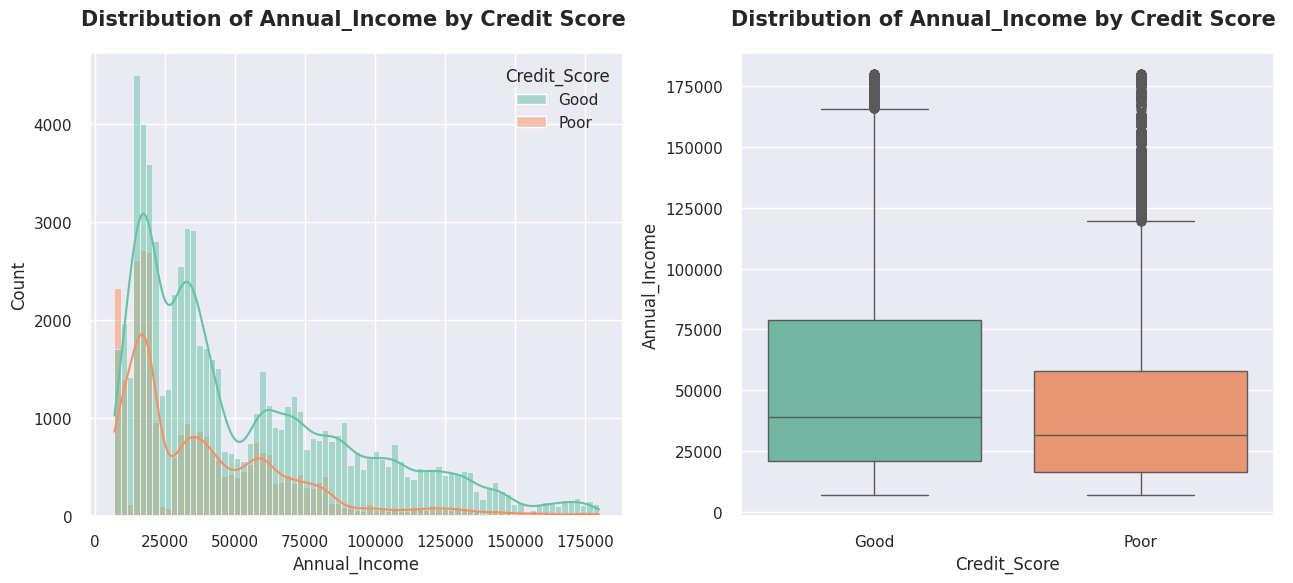

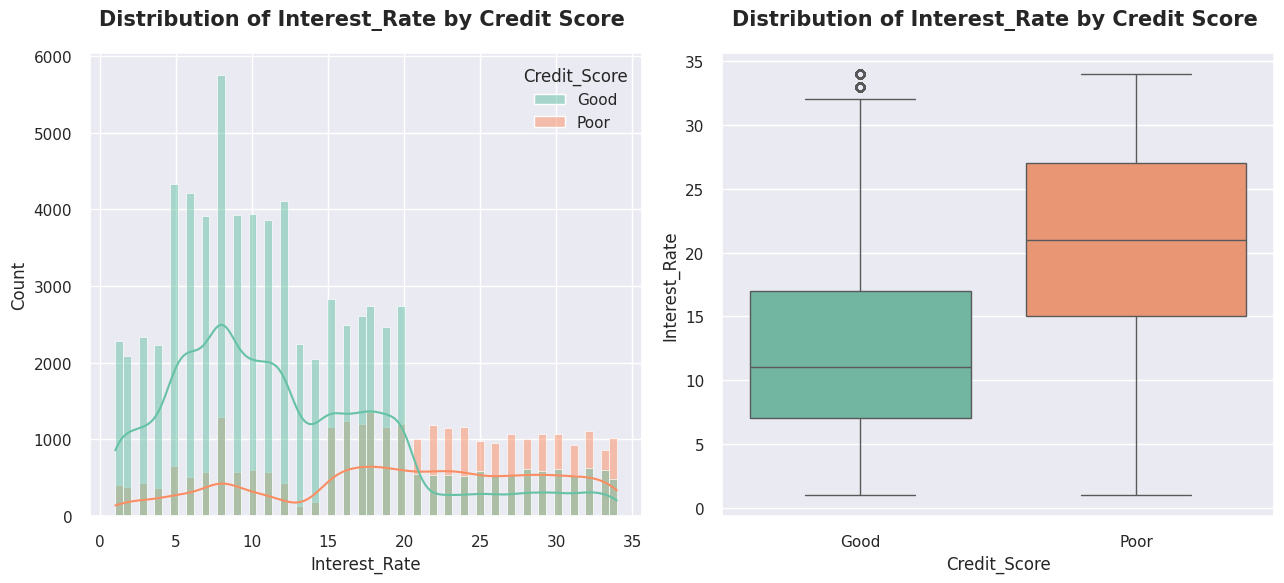

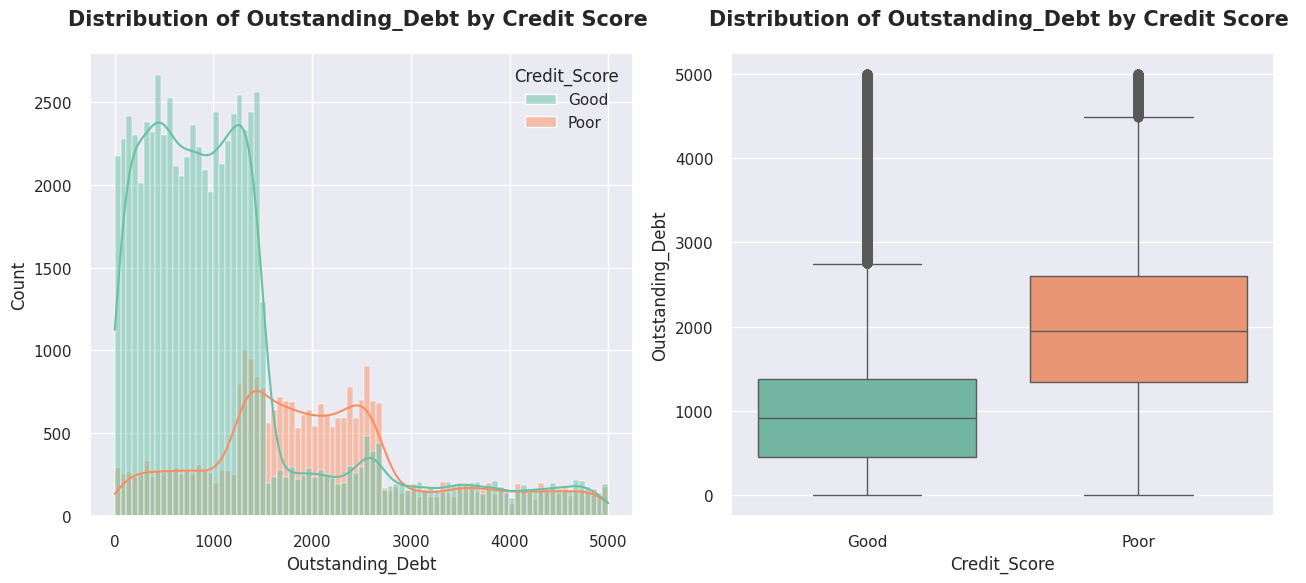

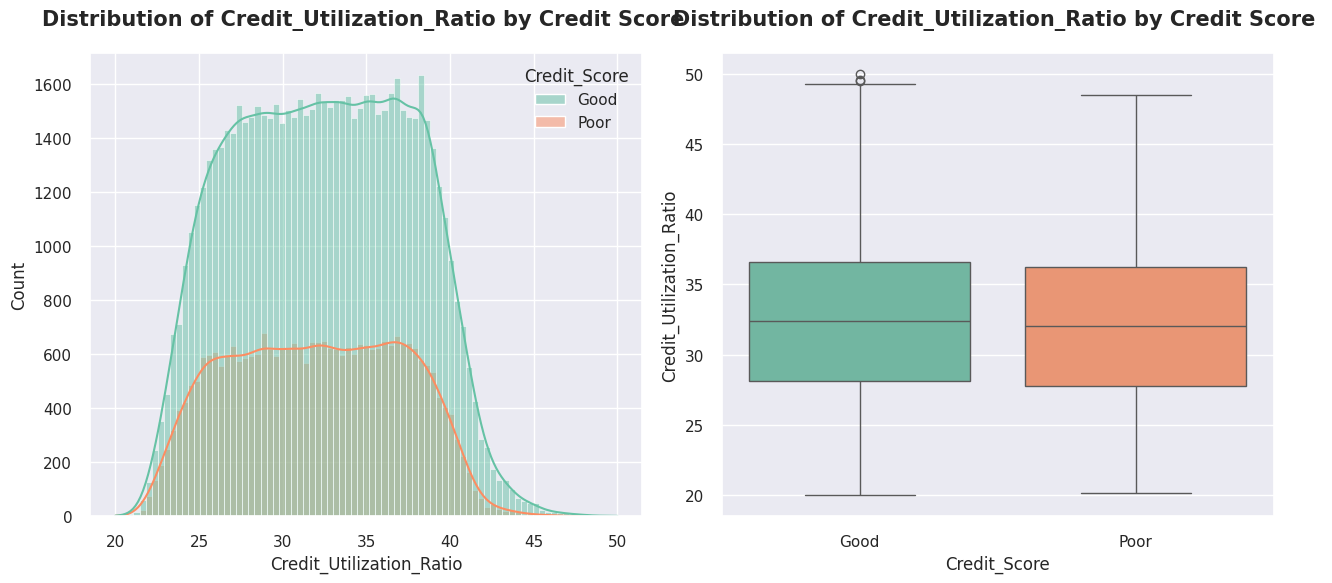

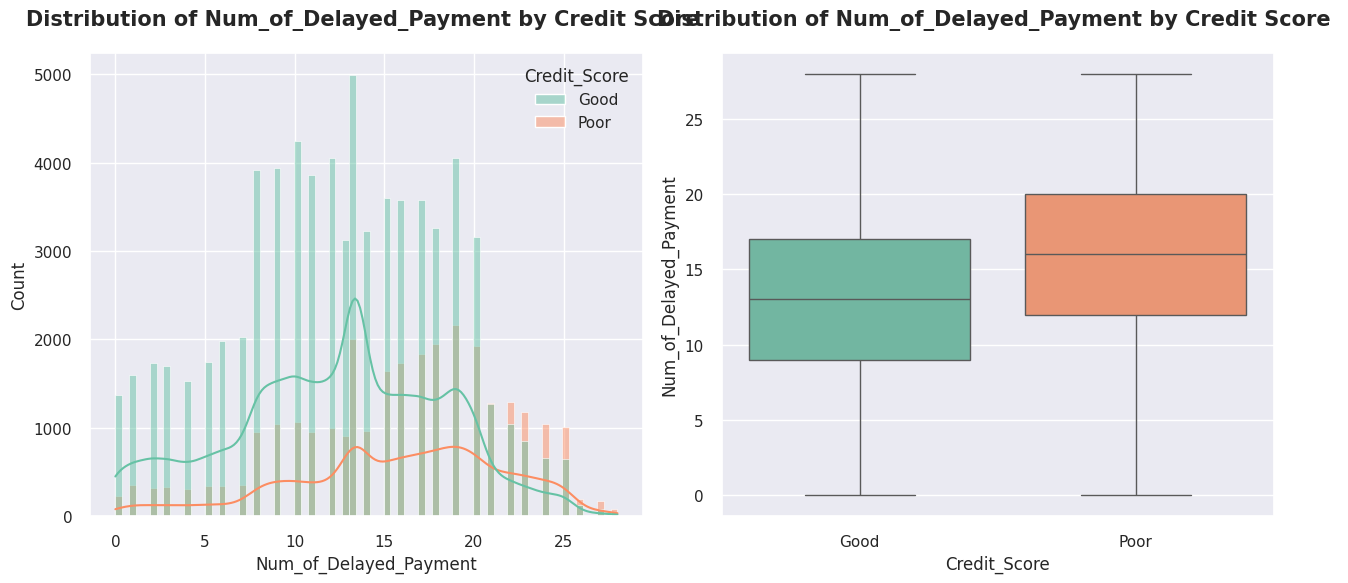

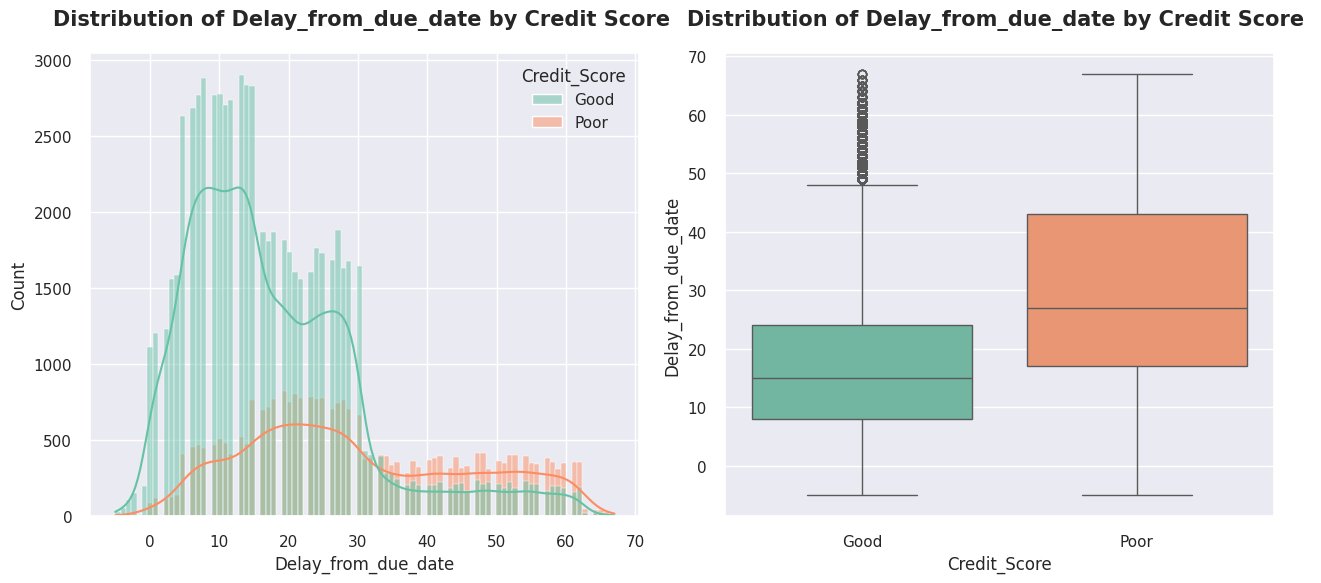

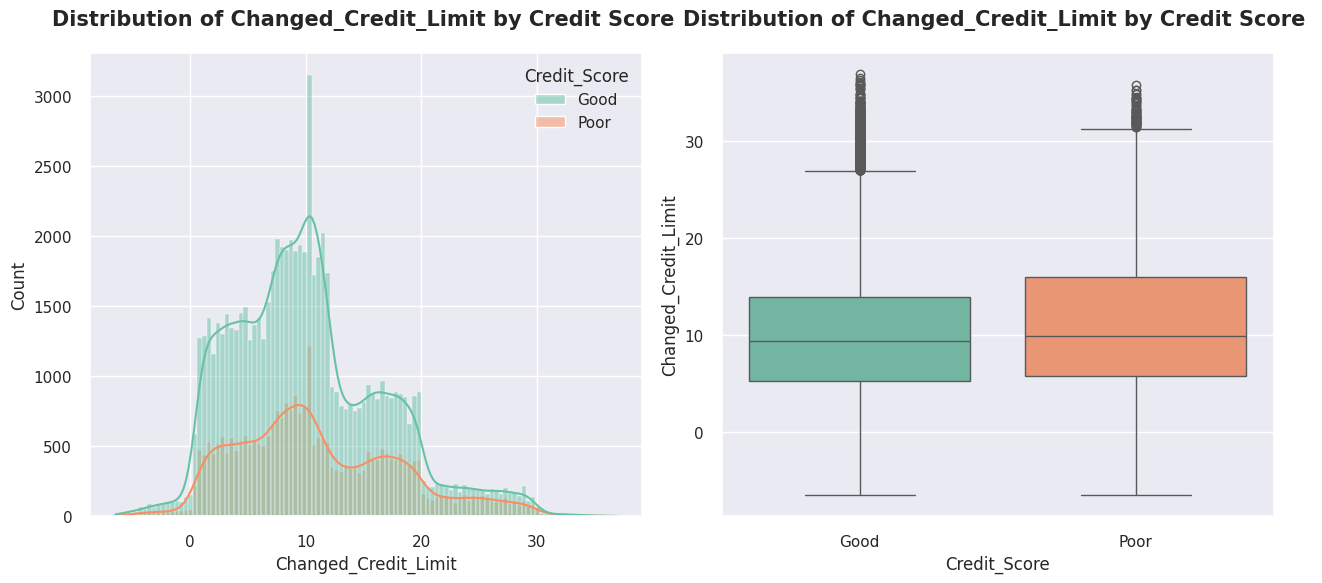

In [76]:
for col in continous_col:
  continous_plot(col)

* Changed_Credit_Limit, Credit_Utilization_Ratio: since the values are approximately equal for both credit score so we can't generate any relevant inference => drop Changed_Credit_Limit, Credit_Utilization_Ratio col

*

In [77]:
#kernel density estimate
def kde_distplot(column, ax, hue_column = 'Credit_Score', show_legend = False, alpha = 0.5, palette = 'crest'):
    sns.set()
    chart = sns.kdeplot(
        data = df,
        x = column,
        hue = hue_column,
        fill = True,
        common_norm = False,
        alpha = alpha,
        linewidth = 0,
        palette = palette,
        legend = show_legend,
        ax = ax
    )

In [78]:
def plot_kernel_density_for_multiple_cols(
    columns_to_plot,
    hue_column = 'Credit_Score',
    show_legend = False,
    alpha = 0.5,
    palette = 'crest'
):

    n = len(columns_to_plot)

    sns.set()
    fig, ax = plt.subplots(1, n, figsize = (n * 5, n))

    fig.suptitle(
        'Kernel density estimate plot',
        color = TITLE_COLOR,
        y = 1.1
    )

    for i, col in enumerate(columns_to_plot):

        kde_distplot(col, ax[i], hue_column, show_legend, alpha, palette)
        ax[i].set_ylabel('')
        ax[i].set_xlabel(' '.join(col.split('_')))

    plt.subplots_adjust(wspace = 0.5)

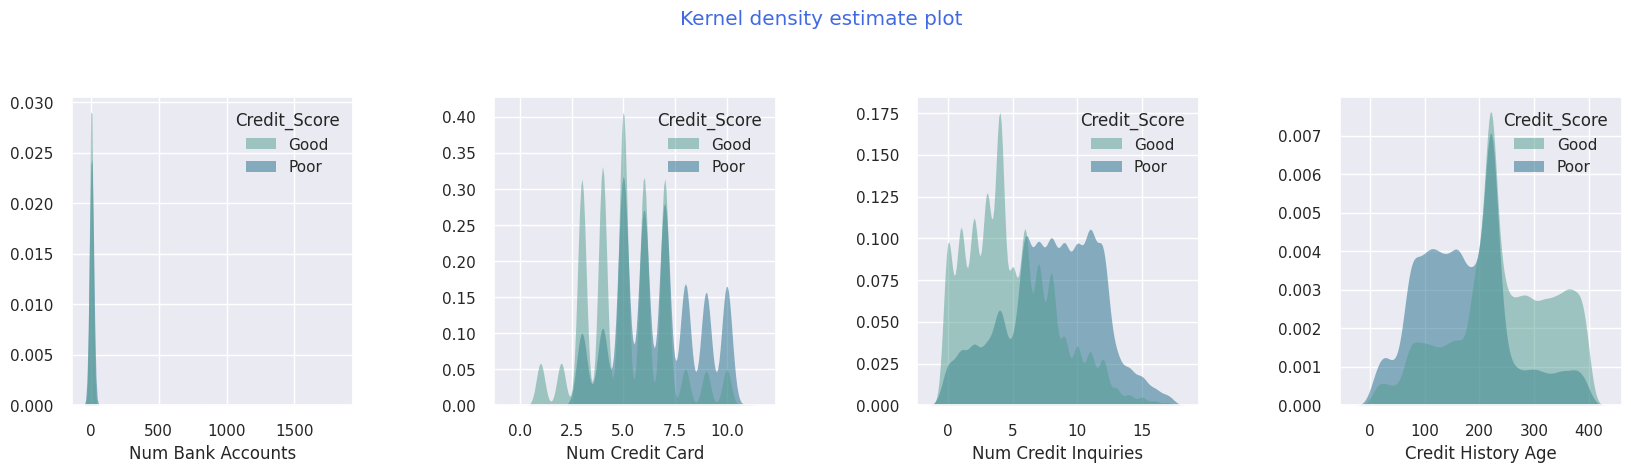

In [79]:
columns_to_plot = [
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Credit_History_Age'

]

plot_kernel_density_for_multiple_cols(
    columns_to_plot,
    show_legend = True
)

[link text](https://)## Data Preprocessing


### drop unpredictive features

In [80]:
df.drop(columns=['Occupation','Changed_Credit_Limit', 'Credit_Utilization_Ratio'] , inplace = True)

In [81]:
df.drop(columns=loan, inplace = True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            100000 non-null  float64
 1   Num_Bank_Accounts        100000 non-null  float64
 2   Num_Credit_Card          100000 non-null  float64
 3   Interest_Rate            100000 non-null  float64
 4   Num_of_Loan              100000 non-null  float64
 5   Delay_from_due_date      100000 non-null  float64
 6   Num_of_Delayed_Payment   100000 non-null  float64
 7   Num_Credit_Inquiries     100000 non-null  float64
 8   Credit_Mix               100000 non-null  object 
 9   Outstanding_Debt         100000 non-null  float64
 10  Credit_History_Age       100000 non-null  float64
 11  Payment_of_Min_Amount    100000 non-null  object 
 12  Total_EMI_per_month      100000 non-null  float64
 13  Amount_invested_monthly  100000 non-null  float64
 14  Month

### Encoding


In [83]:
#Converting Credit_Score
m = {
    "Poor":0,
    "Good":1
}

df['Credit_Score'] = df['Credit_Score'].map(m)

#standard => good. To make it binary classification

In [84]:
df['Credit_Score'].value_counts()

1    71002
0    28998
Name: Credit_Score, dtype: int64

In [85]:
#Converting Payment_of_Min_Amount
m = {
    "Yes": 1,
    "No":0
}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(m)


In [86]:
df['Spent'].unique()

array(['High', 'Low'], dtype=object)

In [87]:
#Converting Spent
m = {
    "High": 1,
    "Low":0
}
df['Spent'] = df['Spent'].map(m)


In [88]:
df['Value_Payments'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

In [89]:
#Converting Spent
m = {
    'Large':2,
    "Medium": 1,
    "Small":0
}
df['Value_Payments'] = df['Value_Payments'].map(m)

In [90]:
df['Credit_Mix'].unique()

array(['Good', 'Bad'], dtype=object)

In [91]:
#Converting Credit_Mix
m = {
    "Bad":0,
    "Good":1
}

df['Credit_Mix'] = df['Credit_Mix'].map(m)

#standard => good. To make it binary classification

### Features Scaling

In [92]:
Numericals

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age']

In [93]:
Numericals =[
  'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age']

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Learning based on X_train
scaler.fit(df[Numericals])

# Scaler on X_train and X_test
df[Numericals] = scaler.transform(df[Numericals])


In [95]:
df.to_csv("Cleaned_SCdata4.csv")

### Split Data

In [96]:
df.Credit_Score.value_counts()


1    71002
0    28998
Name: Credit_Score, dtype: int64

In [97]:
# Divide into X, y
X = df.drop(columns=['Credit_Score'],axis=1)
y = df['Credit_Score']

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
print("Shape of x_train is:",X_train.shape)
print("Shape of x_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (80000, 17)
Shape of x_test is:  (20000, 17)
Shape of y_train is: (80000,)
Shape of y_test is:  (20000,)


###OverSample

In [100]:
# OverSampling
from collections import Counter
print('Before', Counter(y_train))

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print('After', Counter(y_resampled))

Before Counter({1: 56828, 0: 23172})
After Counter({0: 56828, 1: 56828})


# ML MODEL

In [103]:
# Def Builder
from sklearn.metrics import ConfusionMatrixDisplay

def _tunning_model(model, X_resampled, X_test, y_resampled, y_test): #X_resampled, y_resampled
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels= model.classes_)
    disp.plot()

    acc = round(accuracy_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    prec = round(precision_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)

    return model, acc, recall, prec, f1, classification_report(y_test, y_pred)

## LightGBM

In [ ]:
# Grid Search
lgbm_clf = lgbm.LGBMClassifier(random_state=0)
param_grid = {
    'max_depth': [7,9,15,25,30],
    'learning_rate': [0.001, 0.005, 0.01, 0.02],
    'n_estimators': [101, 201, 401]
}
rf_grid = GridSearchCV(lgbm_clf, param_grid=param_grid, scoring='f1')
model_grid = rf_grid.fit(X_resampled, y_resampled)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 45462, number of negative: 45462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1726
[LightGBM] [Info] Number of data points in the train set: 90924, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_le

In [ ]:
# Make predictions on the test set using the best model
y_pred = model_grid.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Best Model F1 score:", f1_score(y_test, y_pred))
print("Best Model roc_auc score:", roc_auc_score(y_test, y_pred))
print("Best Model Hyperparameters:", model_grid.best_params_)

Best Model Accuracy: 0.8106
Best Model F1 score: 0.8594538438705848
Best Model roc_auc score: 0.8059216550942964
Best Model Hyperparameters: {'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 401}


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 56828, number of negative: 56828
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1727
[LightGBM] [Info] Number of data points in the train set: 113656, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Độ chính xác: 0.7801
Recall: 0.7792
Precision: 0.897
F1: 0.834
              precision    recall  f1-score

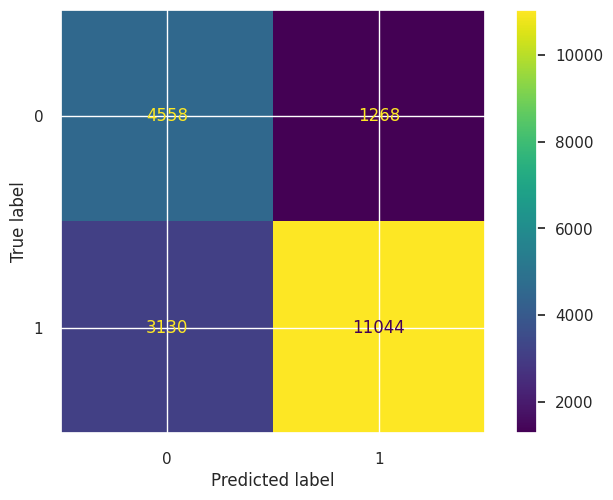

In [ ]:
model = LGBMClassifier(learning_rate = 1, max_depth = 9, n_estimators = 400)
model, acc, recall, prec, f1, report = _tunning_model(model, X_resampled, X_test, y_resampled, y_test) #X_resampled, y_resampled
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)

## AdaBoostClassifier

In [ ]:
# Grid Search
ada_clf = AdaBoostClassifier(random_state=0)
param_grid = {
    'learning_rate': [0.001, 0.005,  0.01, 0.1],
    'n_estimators': [101, 201, 401]
}
ada_grid = GridSearchCV(ada_clf, param_grid = param_grid, scoring='f1')
model_grid = ada_grid.fit(X_resampled, y_resampled) #X_resampled, y_resampled

# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 101}
Best score: 0.7889765824491469


Độ chính xác: 0.794
Recall: 0.8112
Precision: 0.8885
F1: 0.8481
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      5826
           1       0.89      0.81      0.85     14174

    accuracy                           0.79     20000
   macro avg       0.75      0.78      0.76     20000
weighted avg       0.81      0.79      0.80     20000



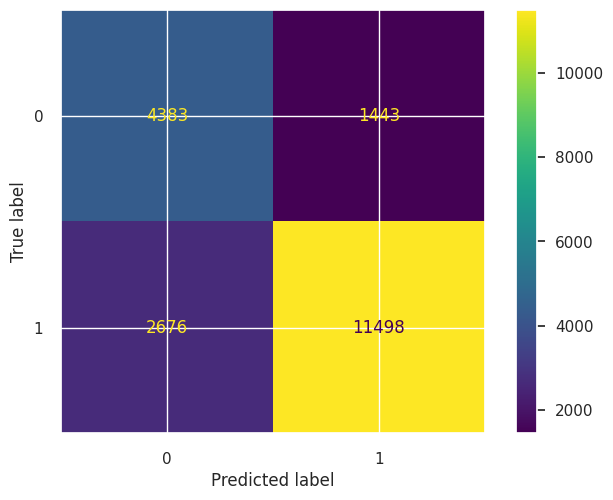

In [ ]:
model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1)
model, acc, recall, prec, f1, report = _tunning_model(model, X_resampled, X_test, y_resampled, y_test) #X_resampled, y_resampled
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)

## RandomForestClassifier

In [104]:
rf = RandomForestClassifier()
# Grid Search CV
grid_space = {'max_depth': [5,10,15,20],
              'n_estimators': [101,201,401],
              'criterion': ['gini','entropy']
              }
rf_grid = GridSearchCV(rf, param_grid = grid_space, scoring = 'f1')
model_grid = rf_grid.fit(X_resampled, y_resampled)

# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 401}
Best score: 0.9106919472519701


Độ chính xác: 0.8723
Recall: 0.8897
Precision: 0.9272
F1: 0.908
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      5826
           1       0.93      0.89      0.91     14174

    accuracy                           0.87     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.88      0.87      0.87     20000



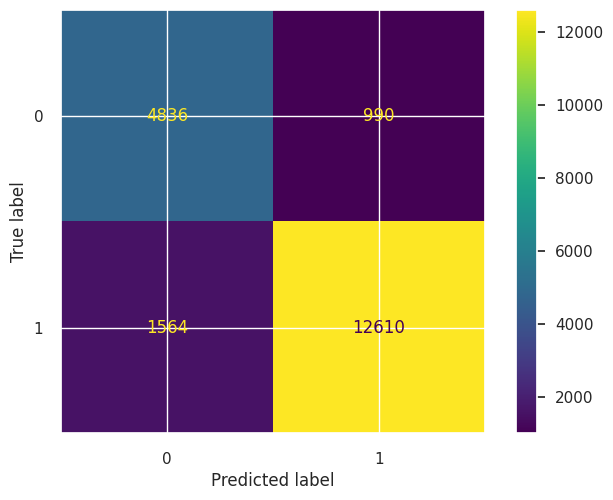

In [105]:
model = RandomForestClassifier(criterion = 'gini', max_depth = 20, n_estimators = 200)
model, acc, recall, prec, f1, report = _tunning_model(model, X_resampled, X_test, y_resampled, y_test) #X_resampled, y_resampled
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)